# Parcial Mecánica de Materiales
## Segundo Corte

**Mayo 19 de 2021**

Este parcial determinará su grado de competencia en el análisis y diseño de vigas por flexión. Asímismo, determinará su capacidad de determinar los esfuerzos normales y cortantes en casos de flexión pura.

## Ejercicio Número 1 (2.0)

El tablón mostrado en la figura está diseñada para soportar las cargas mostradas. Para los valores que le corresponden de acuerdo a la tabla \ref{tab:valores1} determine:


- El diagrama cortante de la viga.
- El diagrama de momento de la viga.
- El Momento máximo de la estructura.
- Si la viga que le correspondió soporta las cargas acorde al $\sigma_{all}=12$MPa

Utilice únicamente los valores que le corresponden de acuerdo a la siguiente tabla:

![image1](problem1MoMBending.png)

In [1]:
import numpy as np
import pandas as pd
lock = False
if lock:
    classlist = pd.read_excel('classlist2021I.xlsx')
    classlist = classlist.drop('Nivel', axis=1)
    # Variations of distances
    t = np.linspace(0.1, 0.3, 6) # meters
    h = np.linspace(0.05, 0.3, 6) # meters
    a = np.linspace(0.2, 0.6, 6) # meters
    L = np.linspace(0.5, 2.5, 6) # meters
    b = np.linspace(0.2, 0.6, 6) # meters
    var_m = {'t':t,'h':h, 'a':a, 'L':L, 'b':b}
    # Variation of the proportions
    x1 = np.random.choice(np.linspace(0.05, 0.25, 6),20) # up to 25% of the total beam length
    x2 = np.random.choice(np.linspace(0.5, 0.75, 6),20) # from 50% up to 75% of the total beam length
    x3 = np.random.choice(np.linspace(0.25, 0.5, 6),20) # from 25% up to 50% of the total beam length
    x4 = np.random.choice(np.linspace(0.75, 1.0, 6),20) # from 75% up to 100% of the total beam length
    var_d = {'x1':x1,'x2':x2,'x3':x3,'x4':x4}

    for key, item in var_m.items():
        classlist[key] = np.random.choice(item,20)
    for key, item in var_d.items():
        classlist[key] = classlist.apply(lambda x: (x['a']+x['L']+x['b']), axis=1)*item
    classlist

    #Loads
    P = np.linspace(1.5, 6, 6)*1000 # N or N/m
    for load in ['P1', 'P2', 'w']:
        classlist[load] = np.random.choice(P,20).astype(np.int64)
    classlist.to_csv('problem1.csv')
else:
    classlist = pd.read_csv('problem1.csv', index_col=[0])

In [2]:
classlist.head()

,ID,Nombre,t,h,a,L,b,x1,x2,x3,x4,P1,P2,w
0,30000048165,"ACERO ROJAS,DANIEL FELIPE",0.22,0.05,0.60,1.3,0.36,0.2938,1.356,0.678,2.147,5100,2400,1500
1,30000022560,"ACOSTA SICHACA,PAULA DANIELA",0.14,0.20,0.60,1.3,0.60,0.2250,1.625,1.125,1.875,1500,2400,2400
2,30000050321,"AREVALO DUEÑAS,TATIANA DANIELA",0.30,0.30,0.60,0.9,0.20,0.4250,0.850,0.510,1.700,6000,4200,2400
3,30000045911,"BUITRAGO PACHON,ANDRES FABIAN",0.10,0.20,0.28,2.5,0.20,0.2682,1.788,0.894,2.682,3300,1500,6000
4,30000050269,"CASAS GONZÁLEZ,CRISTIAN ESTEVEN",0.14,0.05,0.44,1.3,0.60,0.4914,1.521,1.053,2.223,2400,2400,2400


Model for student ACERO ROJAS,DANIEL FELIPE


/home/enprietop/Workspace/Anaconda/envs/datatools/lib/python3.8/site-packages/sympy/plotting/plot.py:1376: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(**a)


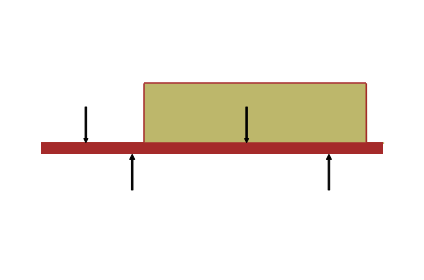

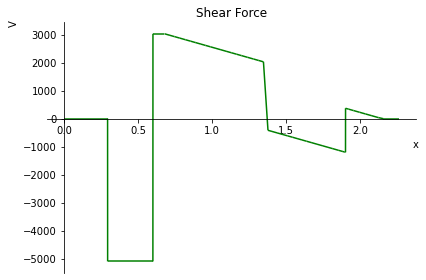

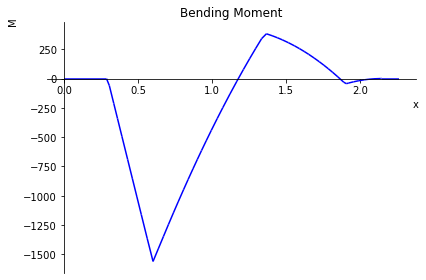

Model for student ACOSTA SICHACA,PAULA DANIELA


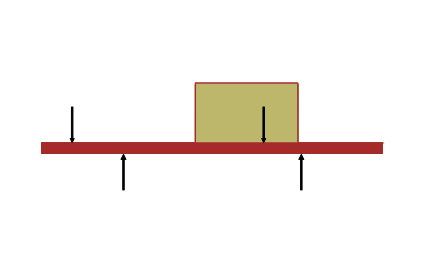

The model could not be solved for student ACOSTA SICHACA,PAULA DANIELA
Model for student AREVALO DUEÑAS,TATIANA DANIELA


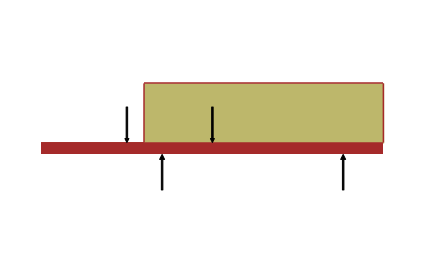

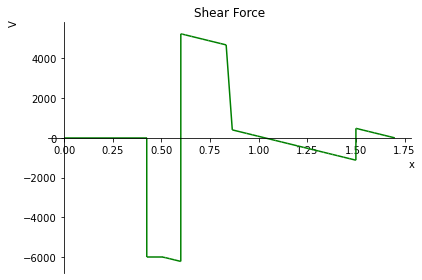

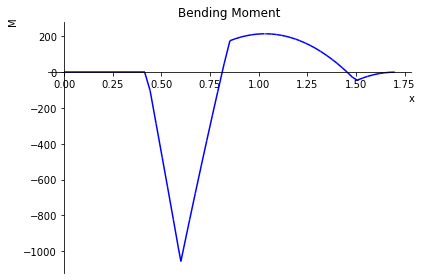

Model for student BUITRAGO PACHON,ANDRES FABIAN


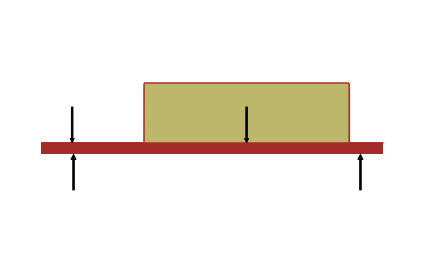

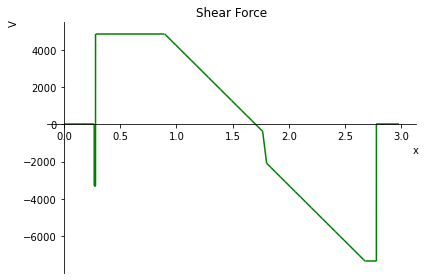

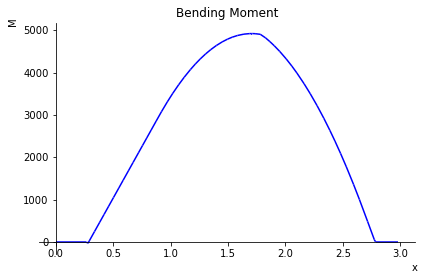

Model for student CASAS GONZÁLEZ,CRISTIAN ESTEVEN


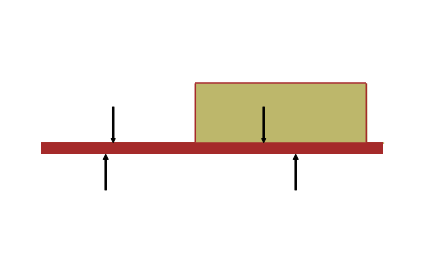

The model could not be solved for student CASAS GONZÁLEZ,CRISTIAN ESTEVEN
Model for student ESTÉVEZ MONCADA,JOHAN SEBASTIÁN


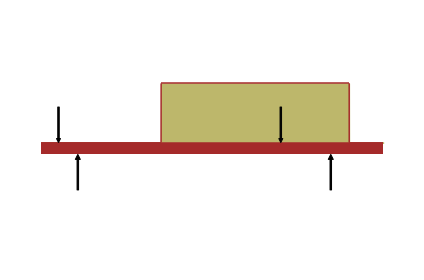

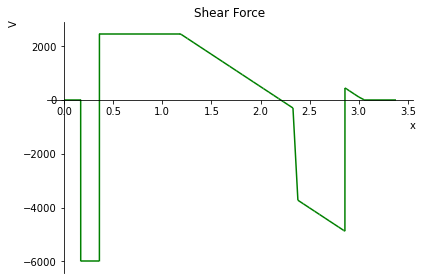

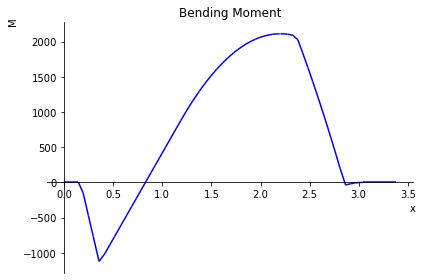

Model for student FANDIÑO ACOSTA,NICOLÁS ALBERTO


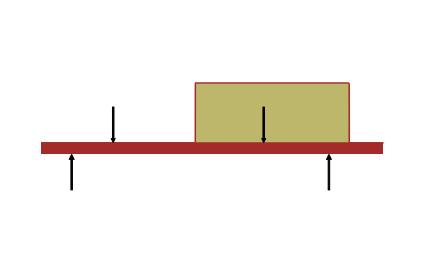

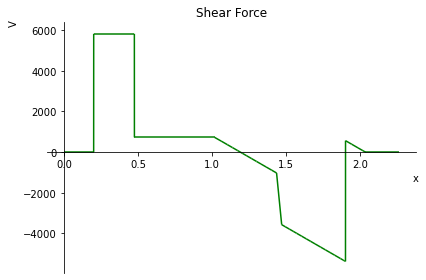

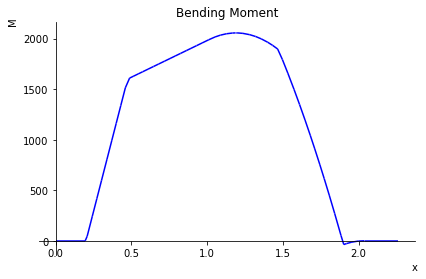

Model for student GARCIA RODRIGUEZ,ANDRES FELIPE


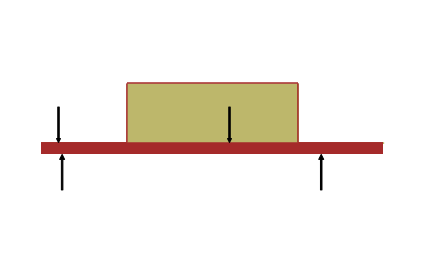

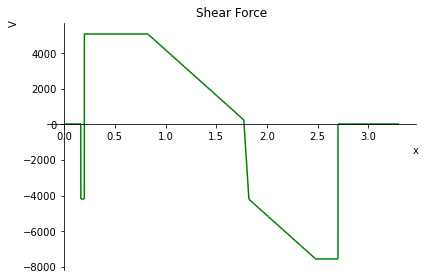

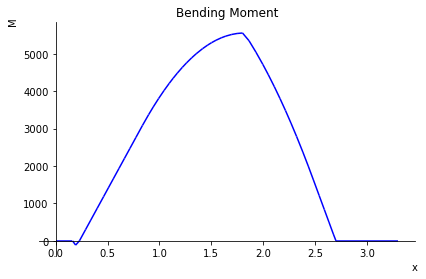

Model for student GARCÍA MARTINEZ,EDUARD CAMILO


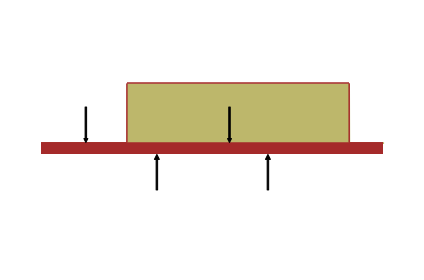

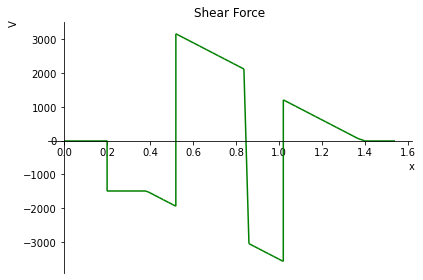

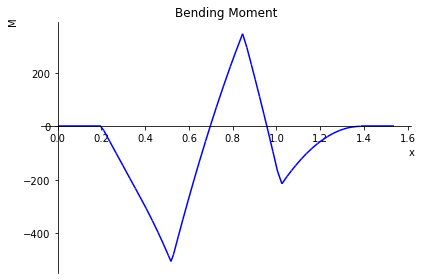

Model for student GÓMEZ CORTÉS,JUAN PABLO


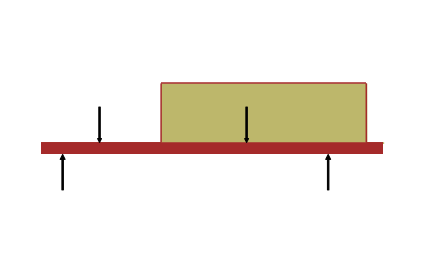

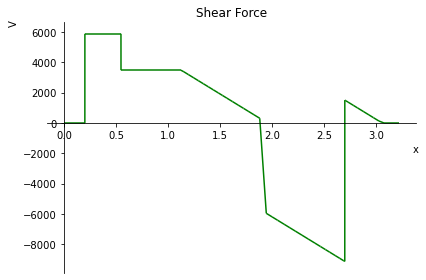

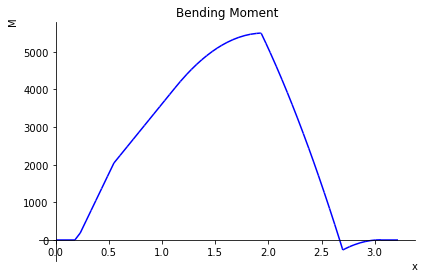

Model for student PARRA MADRIGAL,JUAN GILBERTO


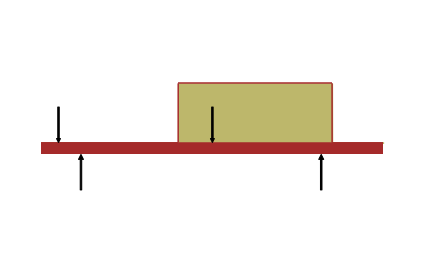

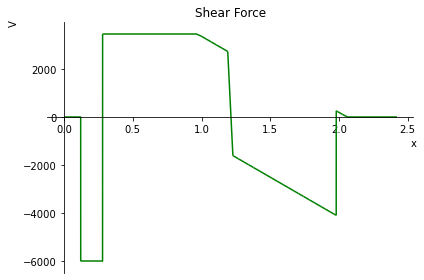

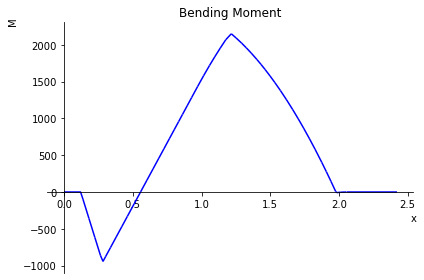

Model for student PEREZ CORTES,ANDRES FELIPE


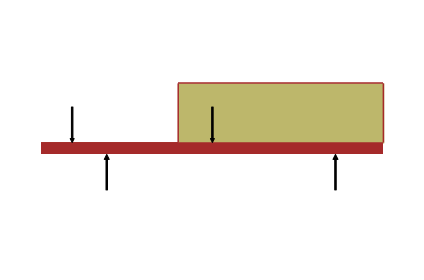

The model could not be solved for student PEREZ CORTES,ANDRES FELIPE
Model for student PONTON VELA,NILSON DAVID


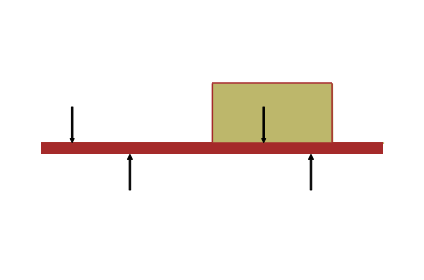

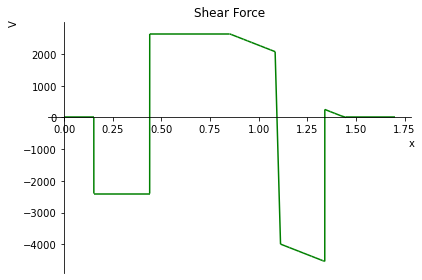

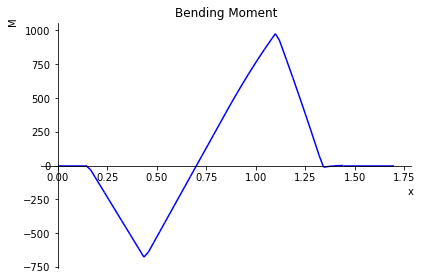

Model for student PORTUGUEZ TORRES,EDUARD ALEXIS


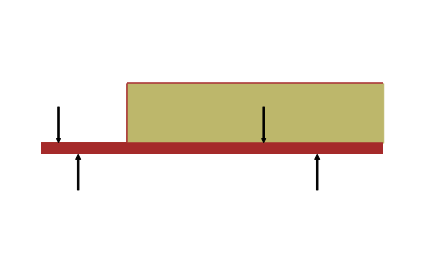

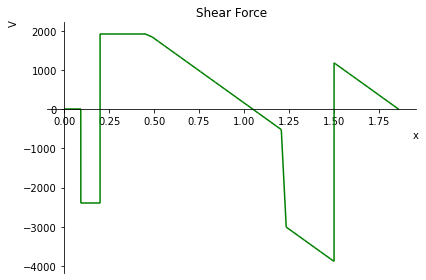

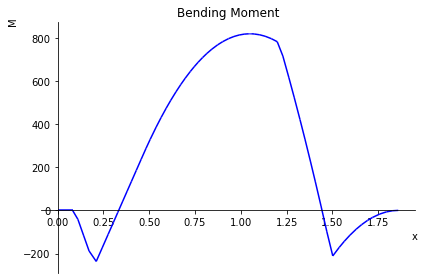

Model for student QUIROGA LANDAZABAL,EMMANUEL


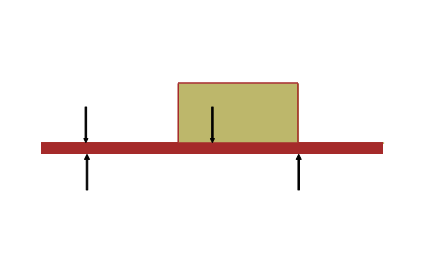

The model could not be solved for student QUIROGA LANDAZABAL,EMMANUEL
Model for student RODRIGUEZ ORDUZ,JUAN SEBASTIAN


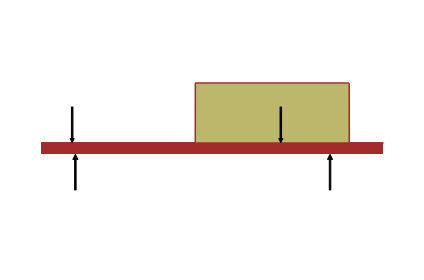

The model could not be solved for student RODRIGUEZ ORDUZ,JUAN SEBASTIAN
Model for student ROJAS COLMENARES,ANGEL ESTEBAN


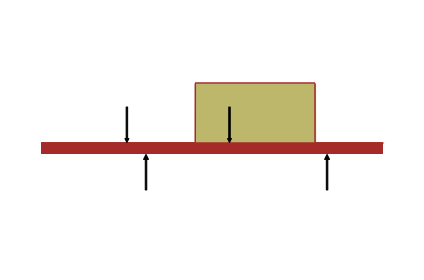

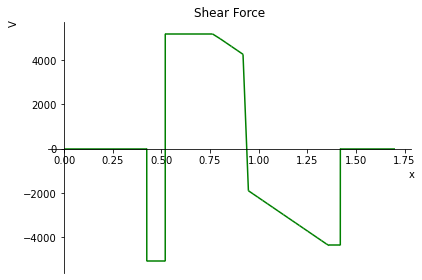

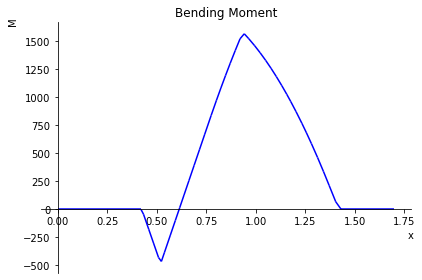

Model for student TICORA GONZALEZ,JONATHAN FELIPE


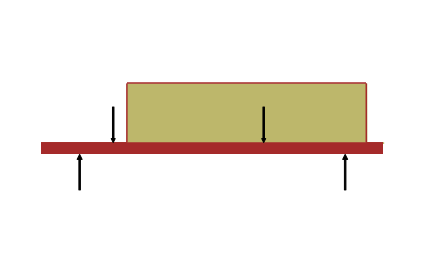

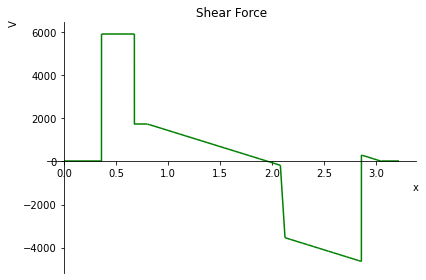

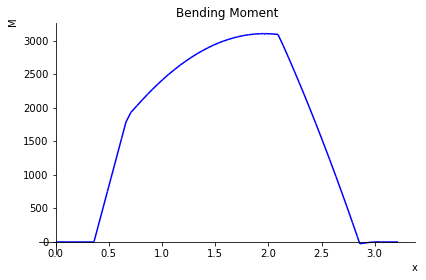

Model for student VILLAMIL TORRES,JORGE ELIECER ALFREDO


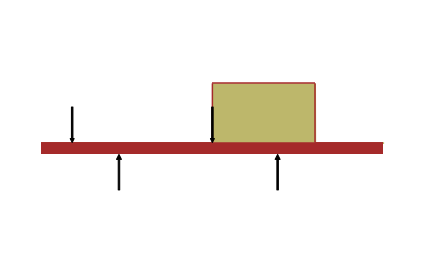

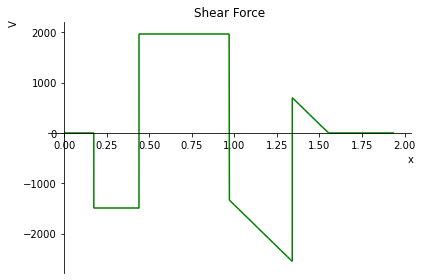

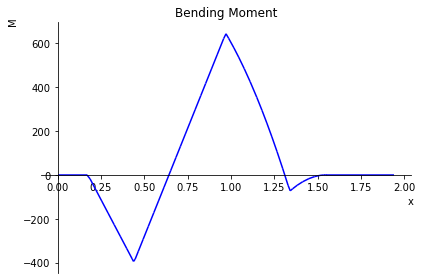

Model for student VILLEGAS BARRANCO,KAREN SOFIA


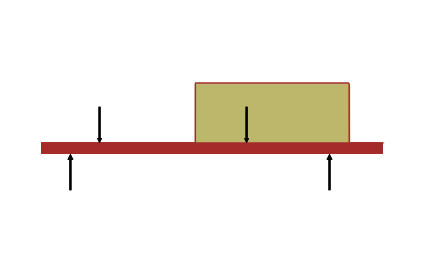

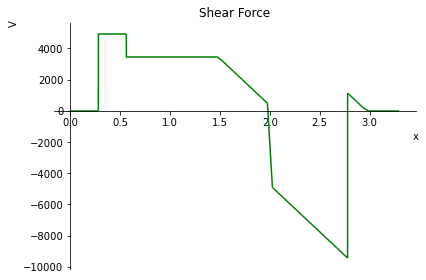

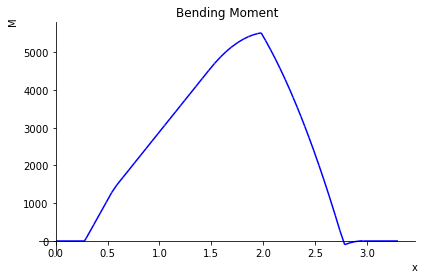

In [3]:
from sympy.physics.continuum_mechanics.beam import Beam
from sympy import symbols

# Calculating the shear and bending moment diagrams
def beam_1(t,h,a,L,b,x1,x2,x3,x4,P1,P2,w):
    """
    Following the Simpy libraries
    
    """  
    k, m, n = symbols('k m n', integer=True)
    
    length = a+L+b
    #Reactions
    A, B = symbols('A, B')
    E, I = symbols('E, I')
    b = Beam(length, E, I)
    #Reaction position no 1
    b.apply_load(A, a, -1)
    #Reaction position no 2
    b.apply_load(B, a+L, -1)
    #P1 and P2 appliance
    b.apply_load(P1, x1, -1)
    b.apply_load(P2, x2, -1)
    # Distributed load w
    b.apply_load(w,x3, 0, end=x4)
    #Solving equation
    b.solve_for_reaction_loads(A,B)
    
    b.shear_force()
    b.bending_moment()
    p = b.draw()
    p.show()
    
    
    b.plot_shear_force()
    b.plot_bending_moment()
    return b, list(b.reaction_loads.values()), list(b.max_bmoment())

outs = {'FA':[], 'FB':[], 'M_loc':[],'M_max':[]}
for i in range(classlist.shape[0]): #
    try:
        print('Model for student {}'.format(classlist['Nombre'][i]))
        model, reactions, max_bmoment = beam_1(**classlist.iloc[i,2:].to_dict())
        outs['FA'].append(reactions[0])
        outs['FB'].append(reactions[1])
        outs['M_loc'].append(max_bmoment[0])
        outs['M_max'].append(max_bmoment[1])
    except ValueError:
        print('The model could not be solved for student {}'.format(classlist['Nombre'][i]))
        outs['FA'].append(0)
        outs['FB'].append(0)
        outs['M_loc'].append(0)
        outs['M_max'].append(0)
        continue

for key, item in outs.items():
    classlist[key] = item


### Cálculo del módulo de la viga

Para determinar si la viga cumple con el esfuerzo permisible debemos determinar el módulo de la viga mediante: $$ \frac{1}{6}bh^2 = S \geq S_{min}$$

Una vez determinado el módulo de cada viga, podemos comparar el módulo de diseño acode al momento máximo así: $$S_{min}= \frac{|M_{max}|}{\sigma_{all}}$$

De ser $S_{min} \ge S$ la viga no resiste las cargas dadas.

In [9]:
classlist['S'] = classlist.apply(lambda x: (1/6)*x['t']*x['h']**2, axis=1)
classlist['S_min'] = classlist.apply(lambda x: x['M_max']/12e6, axis=1)
classlist['Feasible'] = classlist.apply(lambda x: x['S'] > x['S_min'] , axis=1)
#classlist.to_csv('problem1.csv')
classlist.round(2)

,ID,Nombre,t,h,a,L,b,x1,x2,x3,...,P1,P2,w,FA,FB,M_loc,M_max,S,S_min,Feasible
0,30000048165,"ACERO ROJAS,DANIEL FELIPE",0.22,0.05,0.60,1.3,0.36,0.29,1.36,0.68,...,5100,2400,1500,-8131.86634615385,-1571.63365384615,0.600000000000000,1561.62000000000,0.0,0.000130135000000000,False
1,30000022560,"ACOSTA SICHACA,PAULA DANIELA",0.14,0.20,0.60,1.3,0.60,0.22,1.62,1.12,...,1500,2400,2400,0,0,0,0,0.0,0.0,True
2,30000050321,"AREVALO DUEÑAS,TATIANA DANIELA",0.30,0.30,0.60,0.9,0.20,0.42,0.85,0.51,...,6000,4200,2400,-11453.4666666667,-1602.53333333333,0.600000000000000,1059.72000000000,0.0,8.83100000000000e-5,True
3,30000045911,"BUITRAGO PACHON,ANDRES FABIAN",0.10,0.20,0.28,2.5,0.20,0.27,1.79,0.89,...,3300,1500,6000,-8167.64640000000,-7360.35360000000,1.70527440000000,4924.29334588608,0.0,0.000410357778823840,True
4,30000050269,"CASAS GONZÁLEZ,CRISTIAN ESTEVEN",0.14,0.05,0.44,1.3,0.60,0.49,1.52,1.05,...,2400,2400,2400,0,0,0,0,0.0,0.0,True
5,30000050883,"ESTÉVEZ MONCADA,JOHAN SEBASTIÁN",0.30,0.25,0.36,2.5,0.52,0.17,2.37,1.18,...,6000,3300,2400,-8444.49840000000,-5317.10160000000,2.20154100000000,2110.73310561720,0.0,0.000175894425468100,True
6,20141614093,"FANDIÑO ACOSTA,NICOLÁS ALBERTO",0.30,0.05,0.20,1.7,0.36,0.47,1.47,1.02,...,5100,2400,4200,-5825.63488235294,-5945.76511764706,1.18977021008403,2055.98774441657,0.0,0.000171332312034714,False
7,30000048970,"GARCIA RODRIGUEZ,ANDRES FELIPE",0.10,0.10,0.20,2.5,0.60,0.16,1.82,0.82,...,4200,4200,5100,-9279.90000000000,-7535.10000000000,1.81500000000000,5557.78350000000,0.0,0.000463148625000000,False
8,30000050168,"GARCÍA MARTINEZ,EDUARD CAMILO",0.18,0.30,0.52,0.5,0.52,0.20,0.85,0.38,...,1500,5100,3300,-5112.58770000000,-4790.71230000000,0.847000000000000,349.433577900000,0.0,2.91194648250000e-5,True
9,30000050740,"GÓMEZ CORTÉS,JUAN PABLO",0.10,0.15,0.20,2.5,0.52,0.55,1.93,1.13,...,2400,6000,4200,-5879.87232000000,-10634.5276800000,1.93200000000000,5500.04635824000,0.0,0.000458337196520000,False


## Ejercicio No 2 (3.0)

Dada la siguiente figura:

![image2](problem2MoMBending.png)

Proponga la viga óptima en I (wide-flange) para soportar las cargas en mención. El esfuerzo normal permisible a usar es $\sigma_{all}=24$ksi. considere los datos mostrados en la siguiente gráfica. Utilice las tablas del apéndice E del libro de Beer.

Debe plasmar los diagramas de cortante y momento, así mismo determinar el módulo $S$ de la viga, asímismo plasme mínimo 4 opciones que satisfagan el esfuerzo máximo permisible.

In [5]:
lock = False
if lock:
    classlist2 = pd.read_excel('classlist2021I.xlsx')
    classlist2 = classlist2.drop('Nivel', axis=1)
    # Variations of distances
    a = np.linspace(0.2, 3, 8) # ft
    L = np.linspace(4,8,8) # ft
    b = np.linspace(0.2,3,8) # ft
    var_m = {'a':a, 'L':L, 'b':b}
    # Variation of the proportions
    x1 = np.random.choice(np.linspace(0.05, 0.25, 6),20) # up to 25% of the total beam length
    x2 = np.random.choice(np.linspace(0.5, 0.75, 6),20) # from 50% up to 75% of the total beam length
    xi = np.random.choice(np.linspace(0.25, 0.5, 6),20) # from 25% up to 50% of the total beam length
    xn = np.random.choice(np.linspace(0.75, 1.0, 6),20) # from 75% up to 100% of the total beam length
    var_d = {'x1':x1,'x2':x2,'xi':xi,'xn':xn}

    for key, item in var_m.items():
        classlist2[key] = np.random.choice(item,20)
    for key, item in var_d.items():
        classlist2[key] = classlist2.apply(lambda x: (x['a']+x['L']+x['b']), axis=1)*item

    #Loads
    P = np.linspace(1,15,10)*1000 # N or N/m
    for load in ['P1', 'P2', 'Pi', 'Pn']:
        classlist2[load] = np.random.choice(P,20).astype(np.int64)
    classlist2.to_csv('problem2.csv')
else:
    classlist2 = pd.read_csv('problem2.csv', index_col=[0])

In [6]:
classlist2.round(2)

,ID,Nombre,a,L,b,x1,x2,xi,xn,P1,P2,Pi,Pn
0,30000048165,"ACERO ROJAS,DANIEL FELIPE",0.2,7.43,3.0,1.81,6.91,4.78,10.63,10333,7222,1000,11888
1,30000022560,"ACOSTA SICHACA,PAULA DANIELA",0.2,5.14,0.6,0.53,4.46,2.97,4.75,7222,8777,1000,11888
2,30000050321,"AREVALO DUEÑAS,TATIANA DANIELA",2.6,8.00,1.8,2.11,6.82,5.58,12.40,5666,7222,2555,11888
3,30000045911,"BUITRAGO PACHON,ANDRES FABIAN",2.2,6.86,1.4,0.52,6.80,4.71,9.41,11888,4111,8777,15000
4,30000050269,"CASAS GONZÁLEZ,CRISTIAN ESTEVEN",1.8,8.00,2.6,1.61,6.82,3.10,9.30,13444,1000,15000,13444
5,30000050883,"ESTÉVEZ MONCADA,JOHAN SEBASTIÁN",1.4,5.14,1.0,0.98,5.66,1.89,6.41,7222,10333,5666,15000
6,20141614093,"FANDIÑO ACOSTA,NICOLÁS ALBERTO",1.0,5.71,1.4,0.41,5.27,3.65,7.30,5666,7222,11888,7222
7,30000048970,"GARCIA RODRIGUEZ,ANDRES FELIPE",2.6,5.14,1.4,0.82,4.57,3.66,8.69,4111,5666,5666,4111
8,30000050168,"GARCÍA MARTINEZ,EDUARD CAMILO",1.8,6.29,1.4,0.85,7.11,4.74,9.01,5666,13444,1000,1000
9,30000050740,"GÓMEZ CORTÉS,JUAN PABLO",1.8,8.00,0.2,2.10,6.50,5.00,8.50,5666,13444,11888,5666


**Nota:** Las unidades correspondientes a este ejercicio están en sistema americano (ft y lb-f)

Model for student ACERO ROJAS,DANIEL FELIPE


/home/enprietop/Workspace/Anaconda/envs/datatools/lib/python3.8/site-packages/sympy/plotting/plot.py:1376: MatplotlibDeprecationWarning: The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.
  ax.annotate(**a)


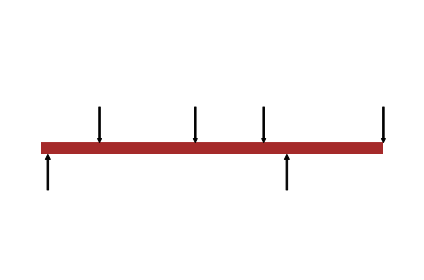

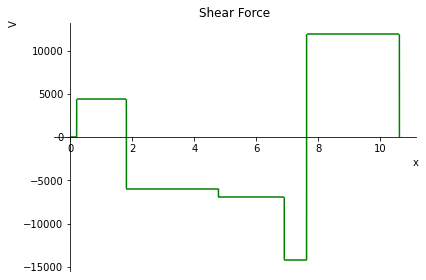

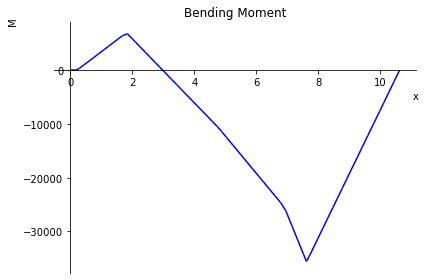

Model for student ACOSTA SICHACA,PAULA DANIELA


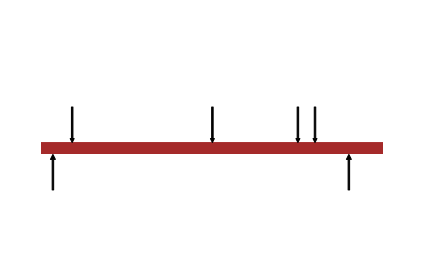

The model could not be solved for student ACOSTA SICHACA,PAULA DANIELA
Model for student AREVALO DUEÑAS,TATIANA DANIELA


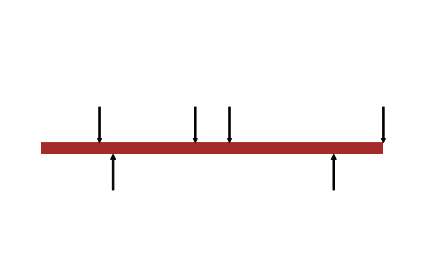

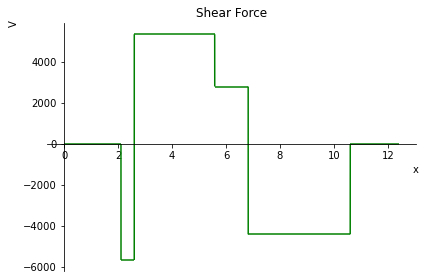

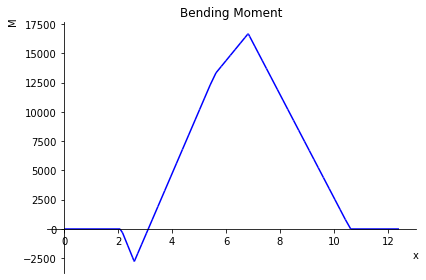

The model could not be solved for student AREVALO DUEÑAS,TATIANA DANIELA
Model for student BUITRAGO PACHON,ANDRES FABIAN


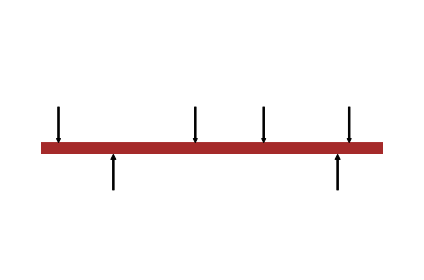

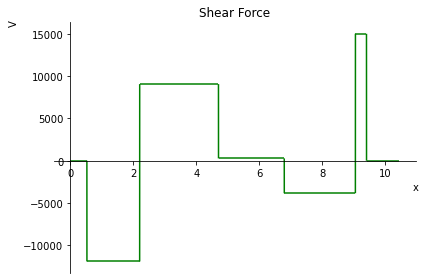

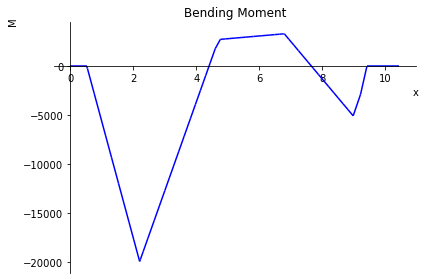

Model for student CASAS GONZÁLEZ,CRISTIAN ESTEVEN


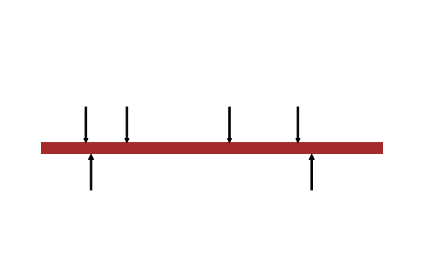

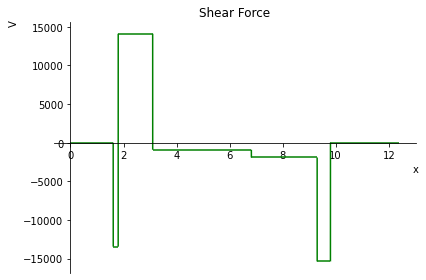

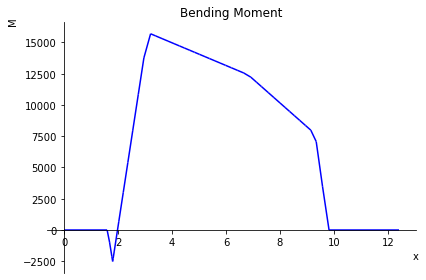

Model for student ESTÉVEZ MONCADA,JOHAN SEBASTIÁN


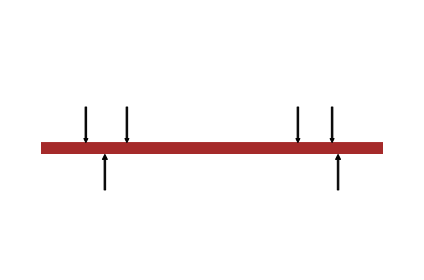

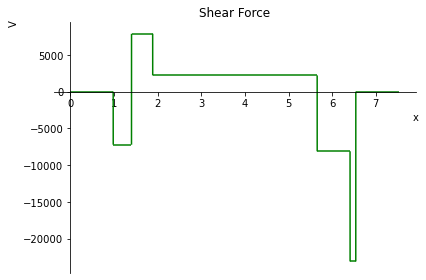

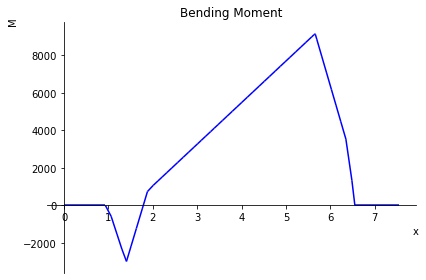

Model for student FANDIÑO ACOSTA,NICOLÁS ALBERTO


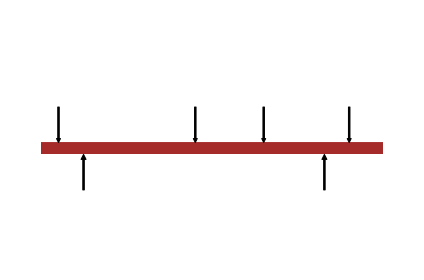

The model could not be solved for student FANDIÑO ACOSTA,NICOLÁS ALBERTO
Model for student GARCIA RODRIGUEZ,ANDRES FELIPE


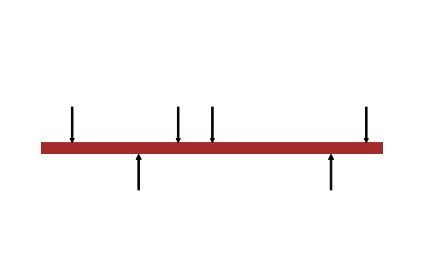

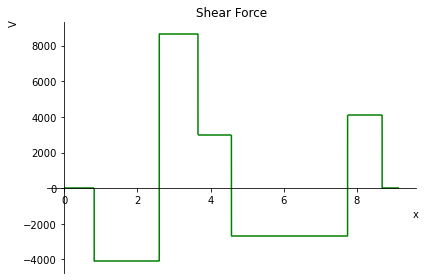

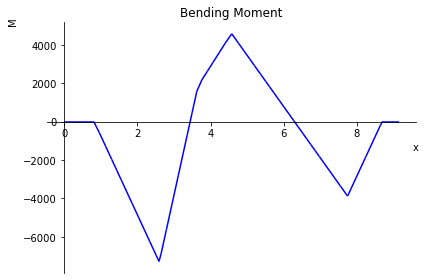

Model for student GARCÍA MARTINEZ,EDUARD CAMILO


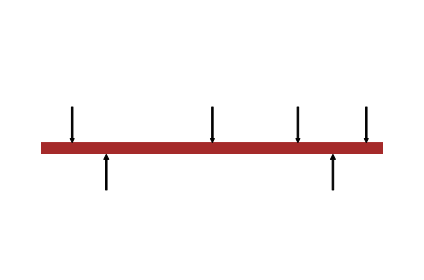

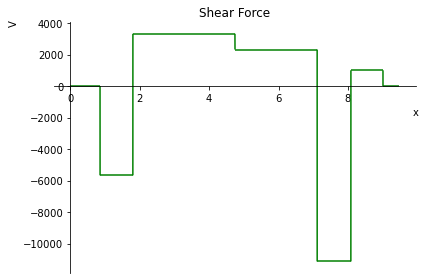

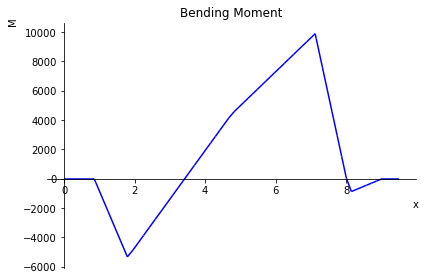

Model for student GÓMEZ CORTÉS,JUAN PABLO


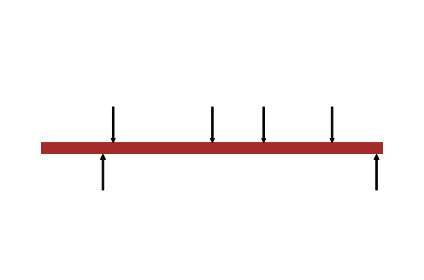

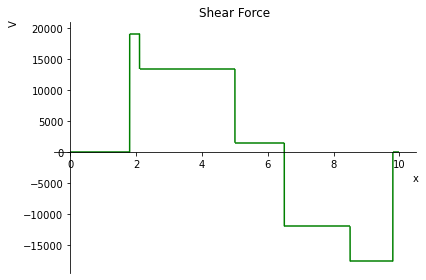

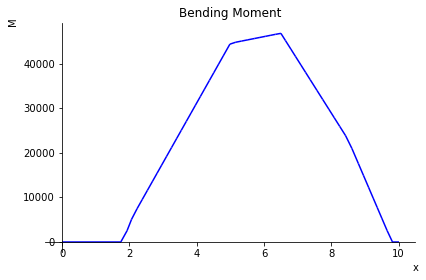

Model for student PARRA MADRIGAL,JUAN GILBERTO


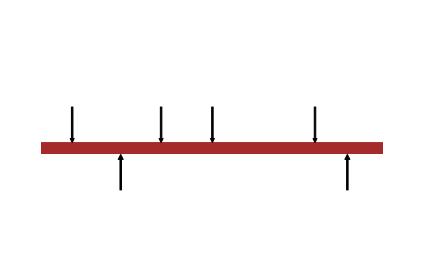

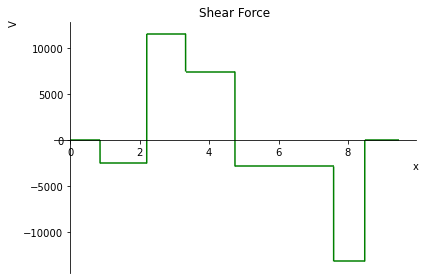

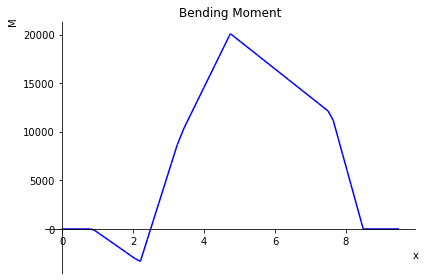

Model for student PEREZ CORTES,ANDRES FELIPE


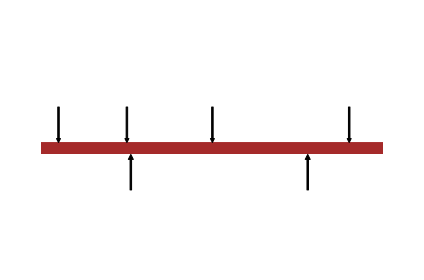

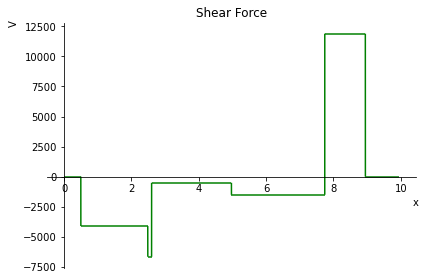

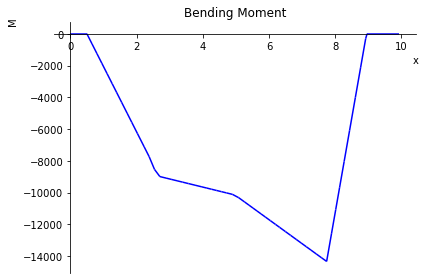

Model for student PONTON VELA,NILSON DAVID


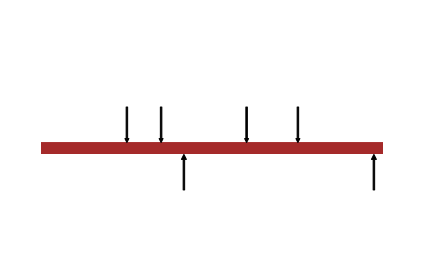

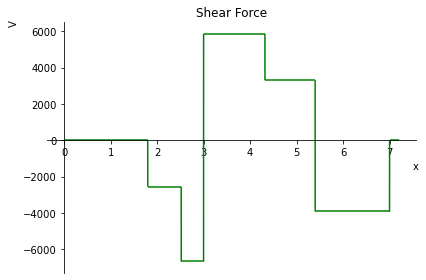

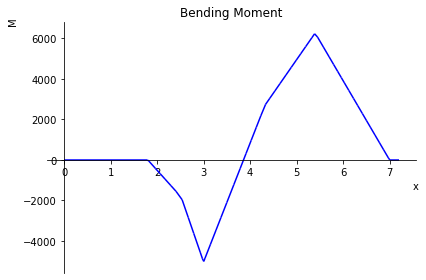

Model for student PORTUGUEZ TORRES,EDUARD ALEXIS


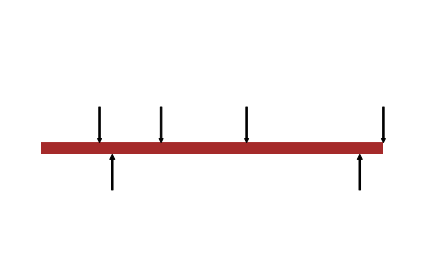

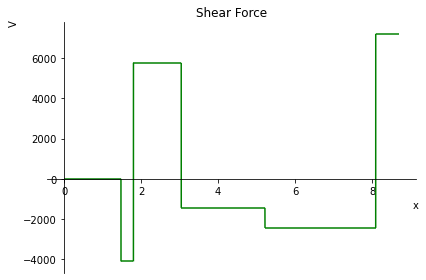

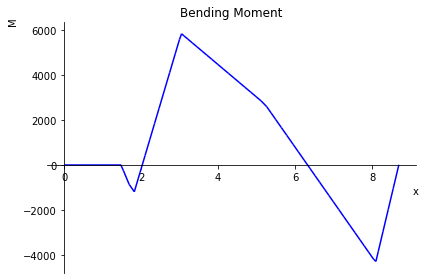

Model for student QUIROGA LANDAZABAL,EMMANUEL


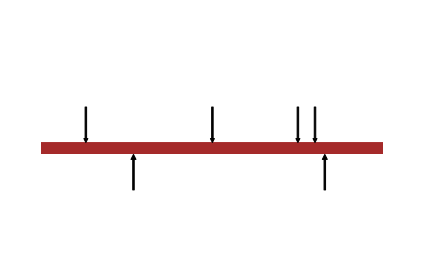

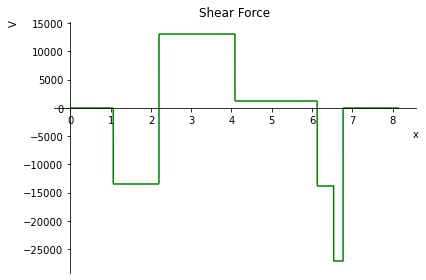

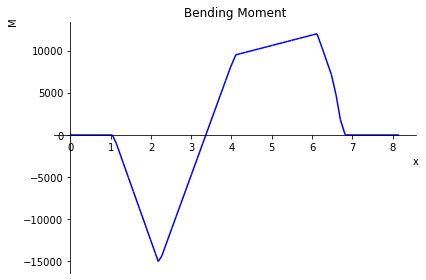

Model for student RODRIGUEZ ORDUZ,JUAN SEBASTIAN


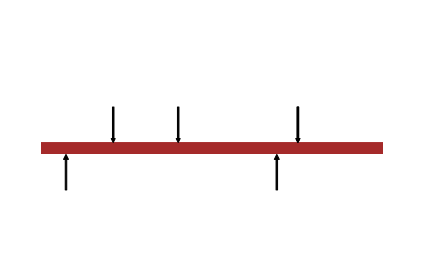

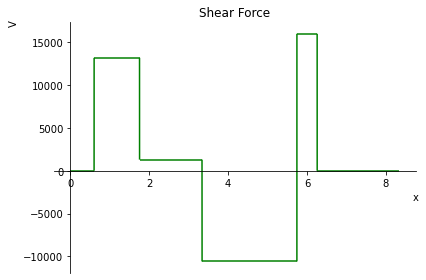

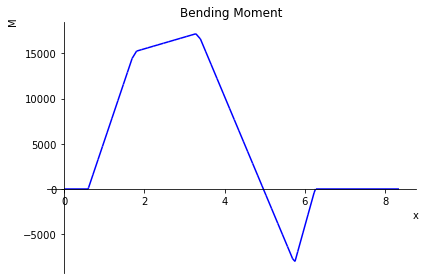

Model for student ROJAS COLMENARES,ANGEL ESTEBAN


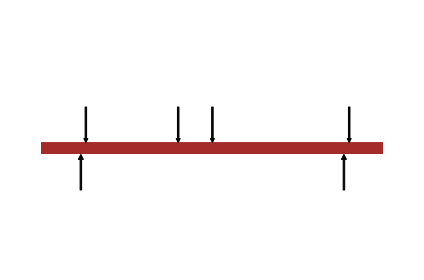

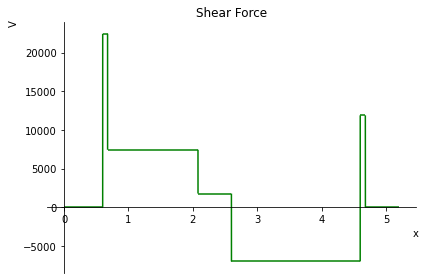

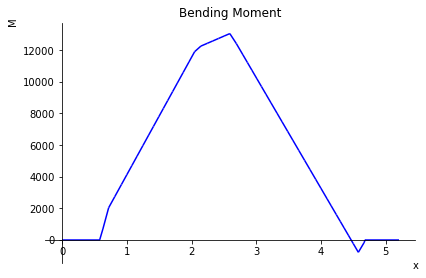

Model for student TICORA GONZALEZ,JONATHAN FELIPE


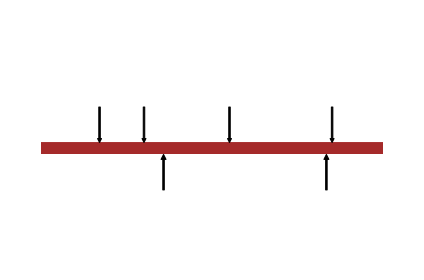

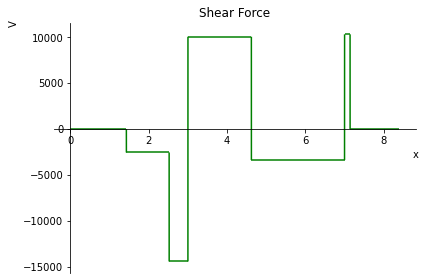

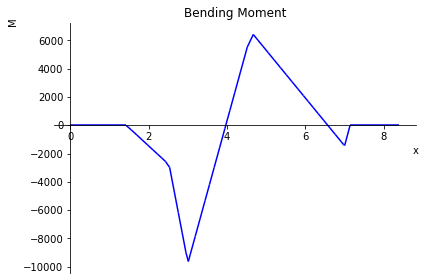

Model for student VILLAMIL TORRES,JORGE ELIECER ALFREDO


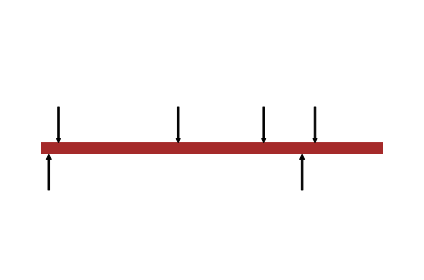

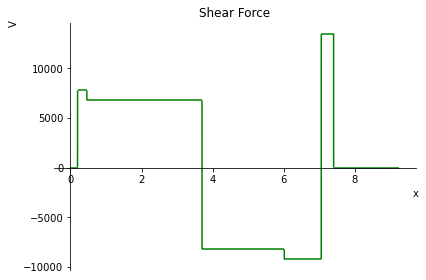

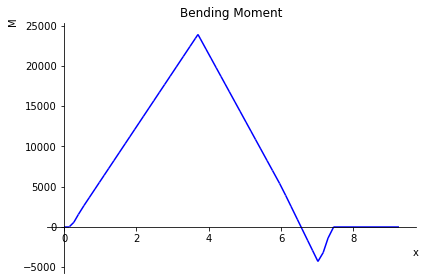

Model for student VILLEGAS BARRANCO,KAREN SOFIA


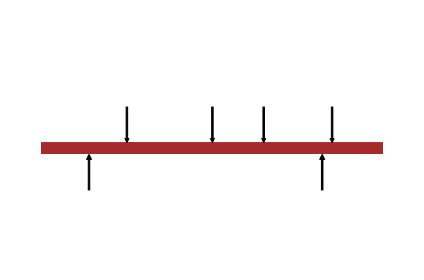

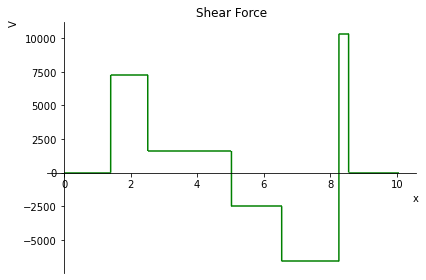

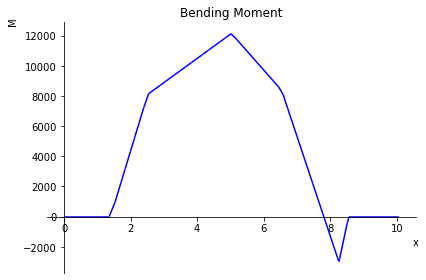

In [7]:
# Calculating the shear and bending moment diagrams
def beam_2(a,L,b,x1,x2,xi,xn,P1,P2,Pi,Pn):
    """
    Following the Simpy libraries
    
    """  
    k, m, n = symbols('k m n', integer=True)
    
    length = a+L+b
    #Reactions
    A, B = symbols('A, B')
    E, I = symbols('E, I')
    b = Beam(length, E, I)
    #Reaction position no 1
    b.apply_load(A, a, -1)
    #Reaction position no 2
    b.apply_load(B, a+L, -1)
    #P1 and P2 appliance
    b.apply_load(P1, x1, -1)
    b.apply_load(P2, x2, -1)
    b.apply_load(Pi, xi, -1)
    b.apply_load(Pn, xn, -1)
    #Solving equation
    b.solve_for_reaction_loads(A,B)
    
    b.shear_force()
    b.bending_moment()
    p = b.draw()
    p.show()
    
    
    b.plot_shear_force()
    b.plot_bending_moment()
    return b, list(b.reaction_loads.values()), list(b.max_bmoment())

outs = {'FA':[], 'FB':[], 'M_loc':[],'M_max':[]}
for i in range(classlist2.shape[0]): #
    try:
        print('Model for student {}'.format(classlist2['Nombre'][i]))
        model, reactions, max_bmoment = beam_2(**classlist2.iloc[i,2:].to_dict())
        outs['FA'].append(reactions[0])
        outs['FB'].append(reactions[1])
        outs['M_loc'].append(max_bmoment[0])
        outs['M_max'].append(max_bmoment[1])
    except (TypeError, ValueError):
        print('The model could not be solved for student {}'.format(classlist2['Nombre'][i]))
        outs['FA'].append(0)
        outs['FB'].append(0)
        outs['M_loc'].append(0)
        outs['M_max'].append(0)
        continue

for key, item in outs.items():
    classlist2[key] = item

Debemos conocer el módulo de diseño de la viga para determinar que geometrías cumplen con la especificación, así: $$S = \frac{|M_{max}|}{\sigma_{all}}$$

**Nota:** No olvidar pasar a pulgadas la carga de momento

In [8]:
classlist2['S'] = classlist2.apply(lambda x: x['M_max']*12/24000,axis=1)
classlist2

,ID,Nombre,a,L,b,x1,x2,xi,xn,P1,P2,Pi,Pn,FA,FB,M_loc,M_max,S
0,30000048165,"ACERO ROJAS,DANIEL FELIPE",0.2,7.428571,3.0,1.806857,6.908571,4.782857,10.628571,10333,7222,1000,11888,-4380.02492307692,-26062.9750769231,7.62857142857143,35664.0000000000,17.8320000000000
1,30000022560,"ACOSTA SICHACA,PAULA DANIELA",0.2,5.142857,0.6,0.534857,4.457143,2.971429,4.754286,7222,8777,1000,11888,0,0,0,0,0.0
2,30000050321,"AREVALO DUEÑAS,TATIANA DANIELA",2.6,8.000000,1.8,2.108000,6.820000,5.580000,12.400000,5666,7222,2555,11888,0,0,0,0,0.0
3,30000045911,"BUITRAGO PACHON,ANDRES FABIAN",2.2,6.857143,1.4,0.522857,6.797143,4.705714,9.411429,11888,4111,8777,15000,-20945.2616666667,-18830.7383333333,(),19937.8742857143,9.96893714285714
4,30000050269,"CASAS GONZÁLEZ,CRISTIAN ESTEVEN",1.8,8.000000,2.6,1.612000,6.820000,3.100000,9.300000,13444,1000,15000,13444,-27535.1840000000,-15352.8160000000,(),15791.0672000000,7.89553360000000
5,30000050883,"ESTÉVEZ MONCADA,JOHAN SEBASTIÁN",1.4,5.142857,1.0,0.980571,5.657143,1.885714,6.411429,7222,10333,5666,15000,-15104.7775555556,-23116.2224444444,(),9160.08273650794,4.58004136825397
6,20141614093,"FANDIÑO ACOSTA,NICOLÁS ALBERTO",1.0,5.714286,1.4,0.405714,5.274286,3.651429,7.302857,5666,7222,11888,7222,0,0,0,0,0.0
7,30000048970,"GARCIA RODRIGUEZ,ANDRES FELIPE",2.6,5.142857,1.4,0.822857,4.571429,3.657143,8.685714,4111,5666,5666,4111,-12773.2511111111,-6780.74888888889,(),7305.83428571429,3.65291714285714
8,30000050168,"GARCÍA MARTINEZ,EDUARD CAMILO",1.8,6.285714,1.4,0.853714,7.114286,4.742857,9.011429,5666,13444,1000,1000,-8981.24509090909,-12128.7549090909,(),9885.07619740260,4.94253809870130
9,30000050740,"GÓMEZ CORTÉS,JUAN PABLO",1.8,8.000000,0.2,2.100000,6.500000,5.000000,8.500000,5666,13444,11888,5666,-19052.7000000000,-17611.3000000000,(),46785.2900000000,23.3926450000000


Con el módulo S, usted selecciona las cuatro opciones cercanas (pero superiores) a ese módulo de diseño.